In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.tsa.api import SimpleExpSmoothing, Holt

In [63]:
f = open("seattle-weather.csv", "r")
orig_df = pd.read_csv(f)
orig_df['date'] = pd.to_datetime(orig_df['date']) 

In [64]:
# Check for null values
orig_df.isnull().any()
# Found zero null values

date             False
precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

In [65]:
# Get the important info from orig_df, and add the month info

df = orig_df[["date", "precipitation", "wind", "temp_max", "temp_min"]].copy()
for i in range(1, 13):
    df["month"+str(i)] = [ 
        int(date.month == i)
        for _, date in df["date"].items()
]

In [66]:
# Normalize wind and precipitation

df["precipitation"] = df["precipitation"] / df["precipitation"].max()
df["wind"] = df["wind"] / df["wind"].max()

In [67]:
# Add yesterday's max and min temperatures

yest_temp_max = df["temp_max"].tolist()
yest_temp_min = df["temp_min"].tolist()
yest_temp_max.pop()
yest_temp_min.pop()
df = df.drop(0)
df = df.reset_index(drop=True)
df["yest_temp_max"] = yest_temp_max
df["yest_temp_min"] = yest_temp_min

In [68]:
# Adding info about weather conditions

zeros_list = [0 for _ in range(len(df))]
df["is_sun"] = zeros_list.copy()
df["is_drizzle"] = zeros_list.copy()
df["is_rain"] = zeros_list.copy()
df["is_snow"] = zeros_list.copy()

for key, val in orig_df["weather"].items():
    if val == "sun":
        df.at[key, "is_sun"] = 1
    elif val == "drizzle":
        df.at[key, "is_drizzle"] = 1
    elif val == "rain":
        df.at[key, "is_rain"] = 1
    elif val == "snow":
        df.at[key, "is_snow"] = 1

In [69]:
# Drop rows containing NaN
df = df.dropna()

In [70]:
# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.3, shuffle=False)

In [71]:
# Prepare the data for training and testing
X_train = train_df.drop(columns=["temp_max", "date"])
y_train = train_df["temp_max"]
X_test = test_df.drop(columns=["temp_max", "date"])
y_test = test_df["temp_max"]

/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa

/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa

/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa

/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa

/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa

/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa

/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa

/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa

/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa

/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/parks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa

Best MSE: 20.979087647923926
Best smoothing parameters: {'alpha': 0.1, 'beta': 0.01, 'gamma': 0.1}


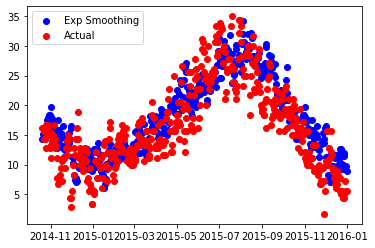

In [60]:
# # Grid search parameters
# smoothing_level_values = np.linspace(0.1, 1.0, 10)
# smoothing_seasonal_values = np.linspace(0.1, 1.0, 10)
# smoothing_trend_values = np.linspace(0.01, 0.1, 10)

# # Find the best smoothing parameters
# best_mse = float('inf')
# best_params = {}

# for alpha in smoothing_level_values:
#     for beta in smoothing_trend_values:
#         for gamma in smoothing_seasonal_values:
#             model = ExponentialSmoothing(
#                 y_train,
#                 seasonal='additive',
#                 seasonal_periods=365,
#                 initialization_method='estimated'
#             )

#             model_fit = model.fit(
#                 smoothing_level=alpha,
#                 smoothing_seasonal=gamma,
#                 smoothing_trend=beta
#             )
            
#             pred = model_fit.predict(start=len(train_df), end=len(df) - 1)
#             mse = mean_squared_error(y_test, pred)

#             if mse < best_mse:
#                 best_mse = mse
#                 best_params['alpha'] = alpha
#                 best_params['beta'] = beta
#                 best_params['gamma'] = gamma

# print("Best MSE:", best_mse)
# print("Best smoothing parameters:", best_params)

# # Fit the exponential smoothing model with the best smoothing parameters
# best_model = ExponentialSmoothing(
#     y_train,
#     seasonal='additive',
#     seasonal_periods=365,
#     initialization_method='estimated'
# )

# best_model_fit = best_model.fit(
#     smoothing_level=best_params['alpha'],
#     smoothing_seasonal=best_params['gamma'],
#     smoothing_trend=best_params['beta']
# )

# # Make predictions with the best model
# best_pred = best_model_fit.predict(start=len(train_df), end=len(df) - 1)

# # Plot the predictions and actual values
# plt.scatter(test_df["date"], best_pred, label="Exp Smoothing", color="b")
# plt.scatter(test_df["date"], y_test.values, label="Actual", color="r")
# plt.legend()
# plt.show()

In [72]:
# Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(y_train, initialization_method="heuristic")
ses_fit = ses_model.fit()
ses_pred = ses_fit.predict(start=len(train_df), end=len(df) - 1)
ses_mse = mean_squared_error(y_test, ses_pred)

# Holt's Linear Exponential Smoothing
holt_model = Holt(y_train, initialization_method="estimated")
holt_fit = holt_model.fit()
holt_pred = holt_fit.predict(start=len(train_df), end=len(df) - 1)
holt_mse = mean_squared_error(y_test, holt_pred)

# Fit the exponential smoothing model
hw_model = ExponentialSmoothing(
    y_train,
    seasonal='additive',
    seasonal_periods=365,
    initialization_method='estimated'
)

# Set the smoothing parameters
smoothing_level = 0.01
smoothing_seasonal = 0.01
smoothing_trend = 0.01

hw_fit = model.fit(
    smoothing_level=smoothing_level,
    smoothing_seasonal=smoothing_seasonal,
    smoothing_trend=smoothing_trend
)
hw_pred = hw_fit.predict(start=len(train_df), end=len(df) - 1)
hw_mse = mean_squared_error(y_test, hw_pred)

Simple Exponential Smoothing MSE: 81.41212700393595
Holt's Linear Exponential Smoothing MSE: 110.66027878053316
Holt-Winters' Seasonal Exponential Smoothing MSE: 18.722617465032954


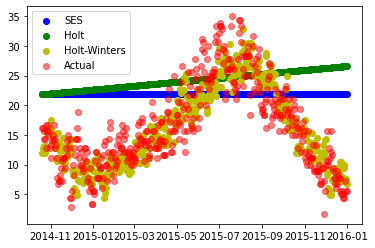

In [73]:
print("Simple Exponential Smoothing MSE:", ses_mse)
print("Holt's Linear Exponential Smoothing MSE:", holt_mse)
print("Holt-Winters' Seasonal Exponential Smoothing MSE:", hw_mse)

# Plot the predictions and actual values
plt.scatter(test_df["date"], ses_pred, label="SES", color="b")
plt.scatter(test_df["date"], holt_pred, label="Holt", color="g")
plt.scatter(test_df["date"], hw_pred, label="Holt-Winters", color="y")
plt.scatter(test_df["date"], y_test.values, label="Actual", color="r", alpha=0.5)
plt.legend()
plt.show()

In [48]:
# # Make predictions
# pred = model_fit.predict(start=len(train_df), end=len(df) - 1)

In [49]:
# Evaluate the model
# print("MSE:", mean_squared_error(y_test, pred))

MSE: 18.722617465032954


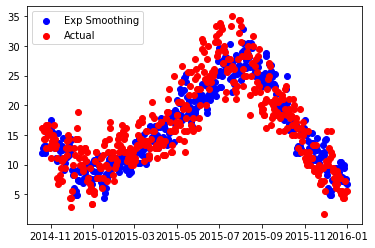

In [41]:
# Plot the predictions and actual values
plt.scatter(test_df["date"], pred, label="Exp Smoothing", color="b")
plt.scatter(test_df["date"], y_test.values, label="Actual", color="r")
plt.legend()
plt.show()